In [1]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
# Initialized parameter 

b = 50        # base of the square (On peut prend l'unité) 10 pixel 
pml = 1     # the thickness of pml layer
pad = 0.5       # the padding between the cavity and the pml layer
n = 1.5       # refractive index the cavity (used resin)
resolution = 20
len_scale = 1

sxy = b + pml + pad
cell_size = mp.Vector3(sxy, sxy, 0)

# Booudary conditions
boudary_layer = mp.PML(pml)

geometry = [mp.Block(mp.Vector3(b,b,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(index=n))]


# Injected sources
wl = 0.8                     # wavelenght in micrometer / in vaccum        
fcen = len_scale/(n*wl)         # pulse center frequency/ n refractive index
df = 0.1                 # pulse frequency width
src = mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(0.25,0.1))

#Simulation
sim = mp.Simulation(cell_size= cell_size,
                    geometry= geometry,
                    sources=[src],
                    resolution=resolution,                    
                    boundary_layers=[boudary_layer])

-----------
Initializing structure...
time for choose_chunkdivision = 0.000470877 s
Working in 2D dimensions.
Computational cell is 51.5 x 51.5 x 0 with resolution 20
     block, center = (0,0,0)
          size (50,50,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 1.95841 s
-----------


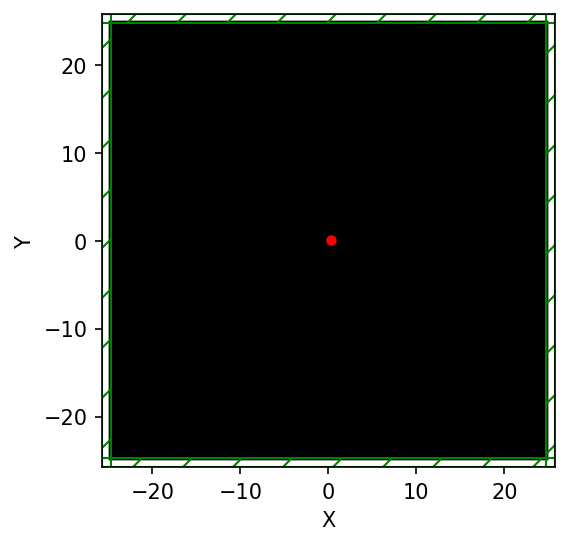

In [5]:
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

In [6]:
# Chercher les fréquences de résonnance autour de f = 0.15

h = mp.Harminv(mp.Ez, mp.Vector3(0.25,0.1), fcen, df)   # Est-ce qu'on s'intéresse par les autres composants?

sim.run(mp.after_sources(h),
        until_after_sources=600)

# after_sources : time step in finte difference is half of the period of the source

FloatProgress(value=0.0, description='0% done ', max=700.0)

Meep progress: 16.275000000000002/700.0 = 2.3% done in 4.0s, 168.3s to go
on time step 652 (time=16.3), 0.00614573 s/step
Meep progress: 30.6/700.0 = 4.4% done in 8.0s, 175.1s to go
on time step 1226 (time=30.65), 0.00697751 s/step
Meep progress: 47.95/700.0 = 6.9% done in 12.0s, 163.3s to go
on time step 1920 (time=48), 0.00576376 s/step
Meep progress: 65.625/700.0 = 9.4% done in 16.0s, 154.8s to go
on time step 2627 (time=65.675), 0.00565873 s/step
Meep progress: 83.17500000000001/700.0 = 11.9% done in 20.0s, 148.4s to go
on time step 3329 (time=83.225), 0.00570327 s/step
Meep progress: 100.775/700.0 = 14.4% done in 24.0s, 142.8s to go
on time step 4033 (time=100.825), 0.00568198 s/step
Meep progress: 118.42500000000001/700.0 = 16.9% done in 28.0s, 137.6s to go
on time step 4739 (time=118.475), 0.00567276 s/step
Meep progress: 135.975/700.0 = 19.4% done in 32.0s, 132.8s to go
on time step 5441 (time=136.025), 0.00569932 s/step
Meep progress: 153.55/700.0 = 21.9% done in 36.0s, 128.2s

In [11]:
harminv = []
for mode in h.modes :
    harminv.append(mode[0])
    
print(harminv)

[0.787179900968133, 0.7921580915688254, 0.7964866913867447, 0.8011352261497017, 0.8047585431796439, 0.8059805206602031, 0.8107053144743804, 0.8155552037625959, 0.8159264142385501, 0.820061086632059, 0.82471692046225, 0.8268168603913989, 0.8295721725213863, 0.8328599616296997, 0.8339490138220935, 0.8385429885640484, 0.8431559115249406, 0.8434696663749409, 0.8480819673424334, 0.8521870836518206, 0.8528188874336717, 0.8574601145147929, 0.8621342200286793, 0.8647899628025022, 0.8668533528368685, 0.8715141541495445, 0.8760806381303611, 0.880791823506813]
